# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here

import pandas as pd 
data=pd.read_csv("../1069_1940_bundle_archive/PS_20174392719_1491204439457_log.csv")
sample = data.sample(n=100000,random_state=0)
sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4644207,330,CASH_IN,607193.64,C104196924,15458649.28,16065842.92,C2020875465,3394537.70,2787344.06,0,0
3800666,281,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.00,0.00,0,0
4426240,322,CASH_OUT,66170.69,C1376666142,32803.00,0.00,C52514926,0.00,66170.69,0,0
5788765,401,TRANSFER,335384.26,C2136161445,197.00,0.00,C2094766437,5311958.61,5647342.87,0,0
2010701,180,CASH_IN,234392.25,C801137003,20882.00,255274.25,C1255594470,0.00,0.00,0,0


In [2]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 4644207 to 2405411
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


In [3]:
sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.275490,1.803276e+05,8.190467e+05,8.397849e+05,1.099411e+06,1.225219e+06,0.001240,0.0
std,142.612187,6.727792e+05,2.865331e+06,2.900862e+06,3.287719e+06,3.605433e+06,0.035192,0.0
min,1.000000,1.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.326999e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.378915e+04,1.382350e+04,0.000000e+00,1.248797e+05,2.101330e+05,0.000000,0.0
75%,334.000000,2.081081e+05,1.058275e+05,1.413050e+05,9.313472e+05,1.102560e+06,0.000000,0.0
max,724.000000,9.244552e+07,3.427425e+07,3.439305e+07,1.765596e+08,1.922789e+08,1.000000,0.0


In [4]:
sample['isFlaggedFraud'].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

In [5]:
sample['isFraud'].value_counts()

0    99876
1      124
Name: isFraud, dtype: int64

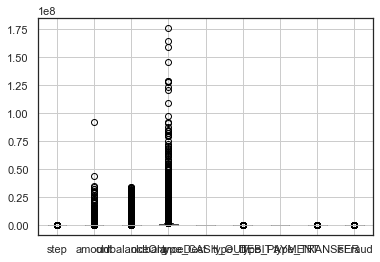

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sample.boxplot()
plt.show()

### What is the distribution of the outcome? 

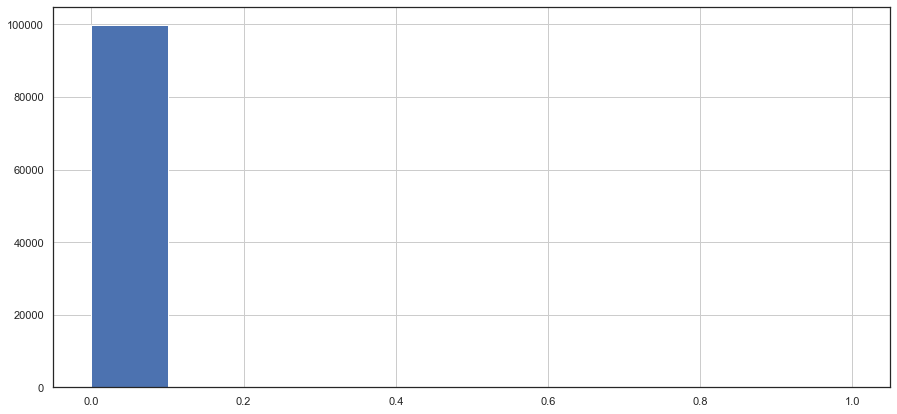

In [69]:
# Your code here

sample["isFraud"].hist(figsize=(15,7))
plt.show()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [8]:
nulls=pd.DataFrame(sample.isnull().sum())
nulls["ratio"]=nulls[0]/sample.shape[0]
nulls


#743h 

dic_h={}

for i in range(1,50,1):
    dic_h[i]=i*24-24


sample["step"].unique()

sample["step"]=sample["step"].apply(lambda x: x-dic_h[np.ceil(x/24)])

In [9]:
sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4644207,18,CASH_IN,607193.64,C104196924,15458649.28,16065842.92,C2020875465,3394537.70,2787344.06,0,0
3800666,17,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.00,0.00,0,0
4426240,10,CASH_OUT,66170.69,C1376666142,32803.00,0.00,C52514926,0.00,66170.69,0,0
5788765,17,TRANSFER,335384.26,C2136161445,197.00,0.00,C2094766437,5311958.61,5647342.87,0,0
2010701,12,CASH_IN,234392.25,C801137003,20882.00,255274.25,C1255594470,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2509568,13,CASH_IN,183904.95,C589053382,3909552.83,4093457.78,C2070922114,2783981.48,2600076.53,0,0
4803430,10,CASH_IN,148290.97,C834241722,2668204.87,2816495.84,C1964640568,1063134.59,914843.62,0,0
6026203,13,CASH_IN,118343.91,C1290750428,5562138.97,5680482.87,C2100356194,488803.74,370459.83,0,0
4169775,16,TRANSFER,10000000.00,C84200062,31118.00,0.00,C96762845,191229.48,53242740.14,0,0


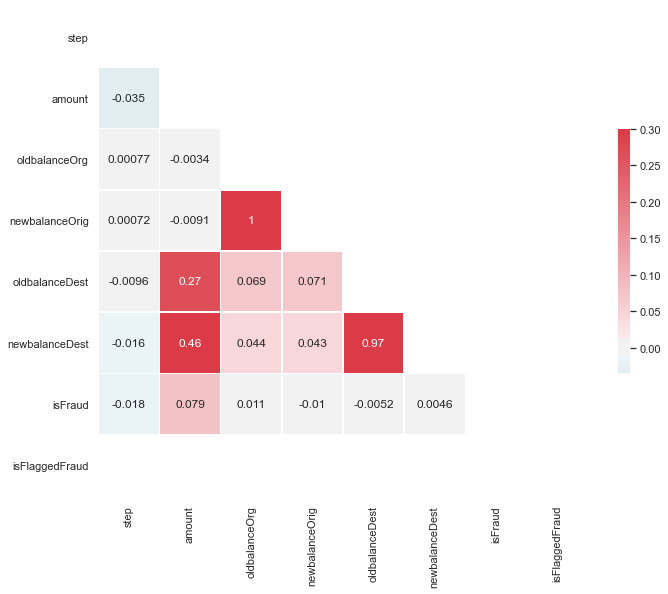

In [10]:
def heatmap_f(dataframe):

    corr = dataframe.corr()

    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
    return plt.show()


heatmap_f(sample)

In [11]:
# Your code here
sample.drop("newbalanceOrig",axis=1,inplace=True)

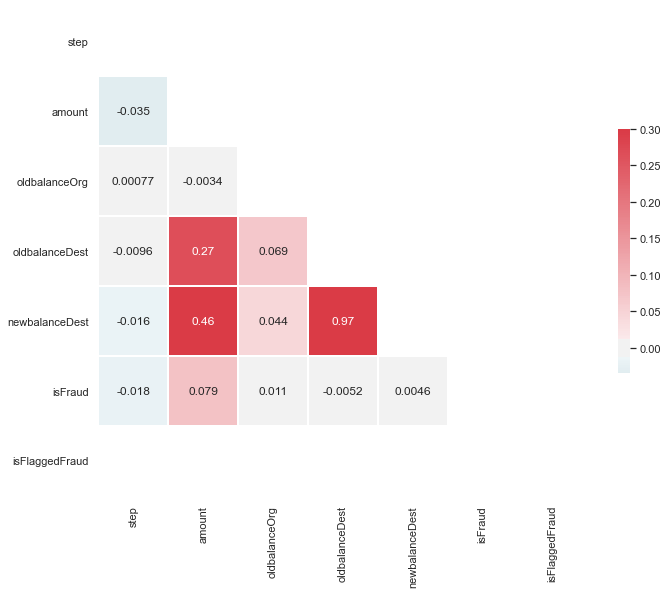

In [12]:
heatmap_f(sample)

In [13]:
sample.drop("newbalanceDest",axis=1,inplace=True)

In [14]:
sample.drop("isFlaggedFraud",axis=1,inplace=True)

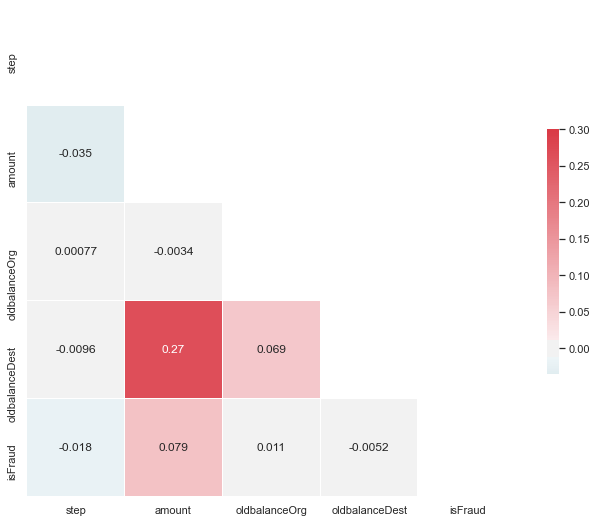

In [15]:
heatmap_f(sample)

In [17]:
#sample_dummies=pd.get_dummies(sample)
#MemoryError: Unable to allocate 8.66 GiB for an array with shape (93011, 100000) and data type uint8
#We can't do dummies of all categorical columns

sample=pd.get_dummies(sample,columns=["type"],drop_first=True)

In [18]:
sample=sample[['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'nameDest',
       'oldbalanceDest', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER','isFraud']]

sample.drop(['nameOrig',"nameDest"],axis=1,inplace=True)

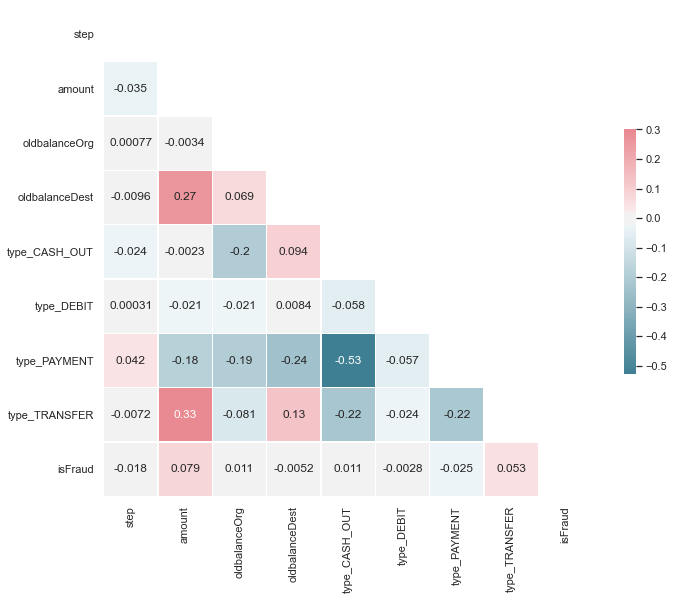

In [19]:
heatmap_f(sample)

In [96]:
X = sample.drop(['isFraud'], axis =1) #features
y = sample['isFraud'] #target

# splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Run a logisitc regression classifier and evaluate its accuracy.

In [98]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

#predictions: test data
y_pred = model.predict(X_test)

# Function to score a CLASSIFICATION exercise

def classification_score(X_test=X_test, y_test=y_test,X_train=X_train,y_train=y_train):
    y_pred = model.predict(X_test)

    # compare predictions to actual answers
    print('Confusion matrix')
    print(confusion_matrix(y_pred,y_test))
    print('-------------------------------------------------------')

    # accuracy_score
    # fitted X_test data vs. y_test data (actual answer)
    print('Accuracy Train score')
    print(model.score(X_train,y_train))
    print('----------------')
    print('Accuracy Test score')
    print(accuracy_score(y_pred,y_test))
    print('-------------------------------------------------------')
    

    # classification report
    print('Classification report')
    print(classification_report(y_pred,y_test))
    return

classification_score()

Confusion matrix
[[19971    26]
 [    1     2]]
-------------------------------------------------------
Accuracy Train score
0.998825
----------------
Accuracy Test score
0.99865
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19997
           1       0.07      0.67      0.13         3

    accuracy                           1.00     20000
   macro avg       0.54      0.83      0.56     20000
weighted avg       1.00      1.00      1.00     20000



### Now pick a model of your choice and evaluate its accuracy.

In [97]:
# Random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier

# create an instance of the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# predict for test 
y_pred = model.predict(X_test)

classification_score()

Confusion matrix
[[19971    14]
 [    1    14]]
-------------------------------------------------------
Accuracy Train score
1.0
----------------
Accuracy Test score
0.99925
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19985
           1       0.50      0.93      0.65        15

    accuracy                           1.00     20000
   macro avg       0.75      0.97      0.83     20000
weighted avg       1.00      1.00      1.00     20000



In [108]:
#SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

sm=SMOTE(random_state=0)
X_train,y_train=sm.fit_sample(X_train,y_train)

# create an instance of the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# predict for test 
y_pred = model.predict(X_test)

classification_score()

Confusion matrix
[[19917    10]
 [   55    18]]
-------------------------------------------------------
Accuracy Train score
1.0
----------------
Accuracy Test score
0.99675
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19927
           1       0.64      0.25      0.36        73

    accuracy                           1.00     20000
   macro avg       0.82      0.62      0.68     20000
weighted avg       1.00      1.00      1.00     20000



In [110]:
#SMOTE METHOD = BAD RESULTS
# LET TRY OVERSAMPLING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
sample_concat=pd.concat([X_train,y_train],axis=1)

#separate minority and majority classes
not_fraud=sample_concat[sample_concat["isFraud"]==0] #majority class
fraud=sample_concat[sample_concat["isFraud"]==1]

from sklearn.utils import resample

fraud_upsampled=resample(fraud,
                        replace=True, #sample with replacement
                        n_samples=len(not_fraud), # match number in majority class
                        random_state=0
                        )
sample_concat2=pd.concat([not_fraud,fraud_upsampled])

X_train = sample_concat2.drop(['isFraud'], axis =1) #features
y_train = sample_concat2['isFraud'] #target


# create an instance of the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# predict for test 
y_pred = model.predict(X_test)

classification_score()

Confusion matrix
[[19967    10]
 [    5    18]]
-------------------------------------------------------
Accuracy Train score
1.0
----------------
Accuracy Test score
0.99925
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19977
           1       0.64      0.78      0.71        23

    accuracy                           1.00     20000
   macro avg       0.82      0.89      0.85     20000
weighted avg       1.00      1.00      1.00     20000



### Which model worked better and how do you know?

In [ ]:
# Of the models tested  the best is Random Forest Classifier without downsampling.

# Random Forest with oversampling or SMOTE has worst recall results. ATM DON'T UNDERSTAND WHY THIS IS HAPPENING

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.